In [1]:
# Keep plots inline in Jupyter Notebook

import numpy as np
%matplotlib inline

In [2]:
# Importing Pandas for data manipulation and analysis
# Loading the diabetes dataset using Pandas

import pandas as pd
Heart_data_set = pd.read_csv('Data_Sets/heart_disease_data.csv')

In [3]:
# Printing the first 5 rows of the data set

Heart_data_set.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
# Printing information on the data set

Heart_data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
# Checking for missing values

Heart_data_set.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
# Function to count the total number of negative values in a specified features

def count_negative_values(df, column_name):

    if column_name in df.columns:
        return (df[column_name] < 0).sum()
    else:
        raise ValueError(f"Column '{column_name}' not found in the DataFrame.")

In [7]:
# Counting the number of negative values in specified features

for column in Heart_data_set.columns:
    print('Number of Negative values in column {} is : {}'.format(column, count_negative_values(Heart_data_set, column)))

Number of Negative values in column age is : 0
Number of Negative values in column sex is : 0
Number of Negative values in column cp is : 0
Number of Negative values in column trestbps is : 0
Number of Negative values in column chol is : 0
Number of Negative values in column fbs is : 0
Number of Negative values in column restecg is : 0
Number of Negative values in column thalach is : 0
Number of Negative values in column exang is : 0
Number of Negative values in column oldpeak is : 0
Number of Negative values in column slope is : 0
Number of Negative values in column ca is : 0
Number of Negative values in column thal is : 0
Number of Negative values in column target is : 0


In [8]:
# Checking for duplicate rows in the dataset

print(sum(Heart_data_set.duplicated()))

1


In [9]:
# Removing duplicate rows from the dataset

Heart_data_set.drop_duplicates(inplace=True)

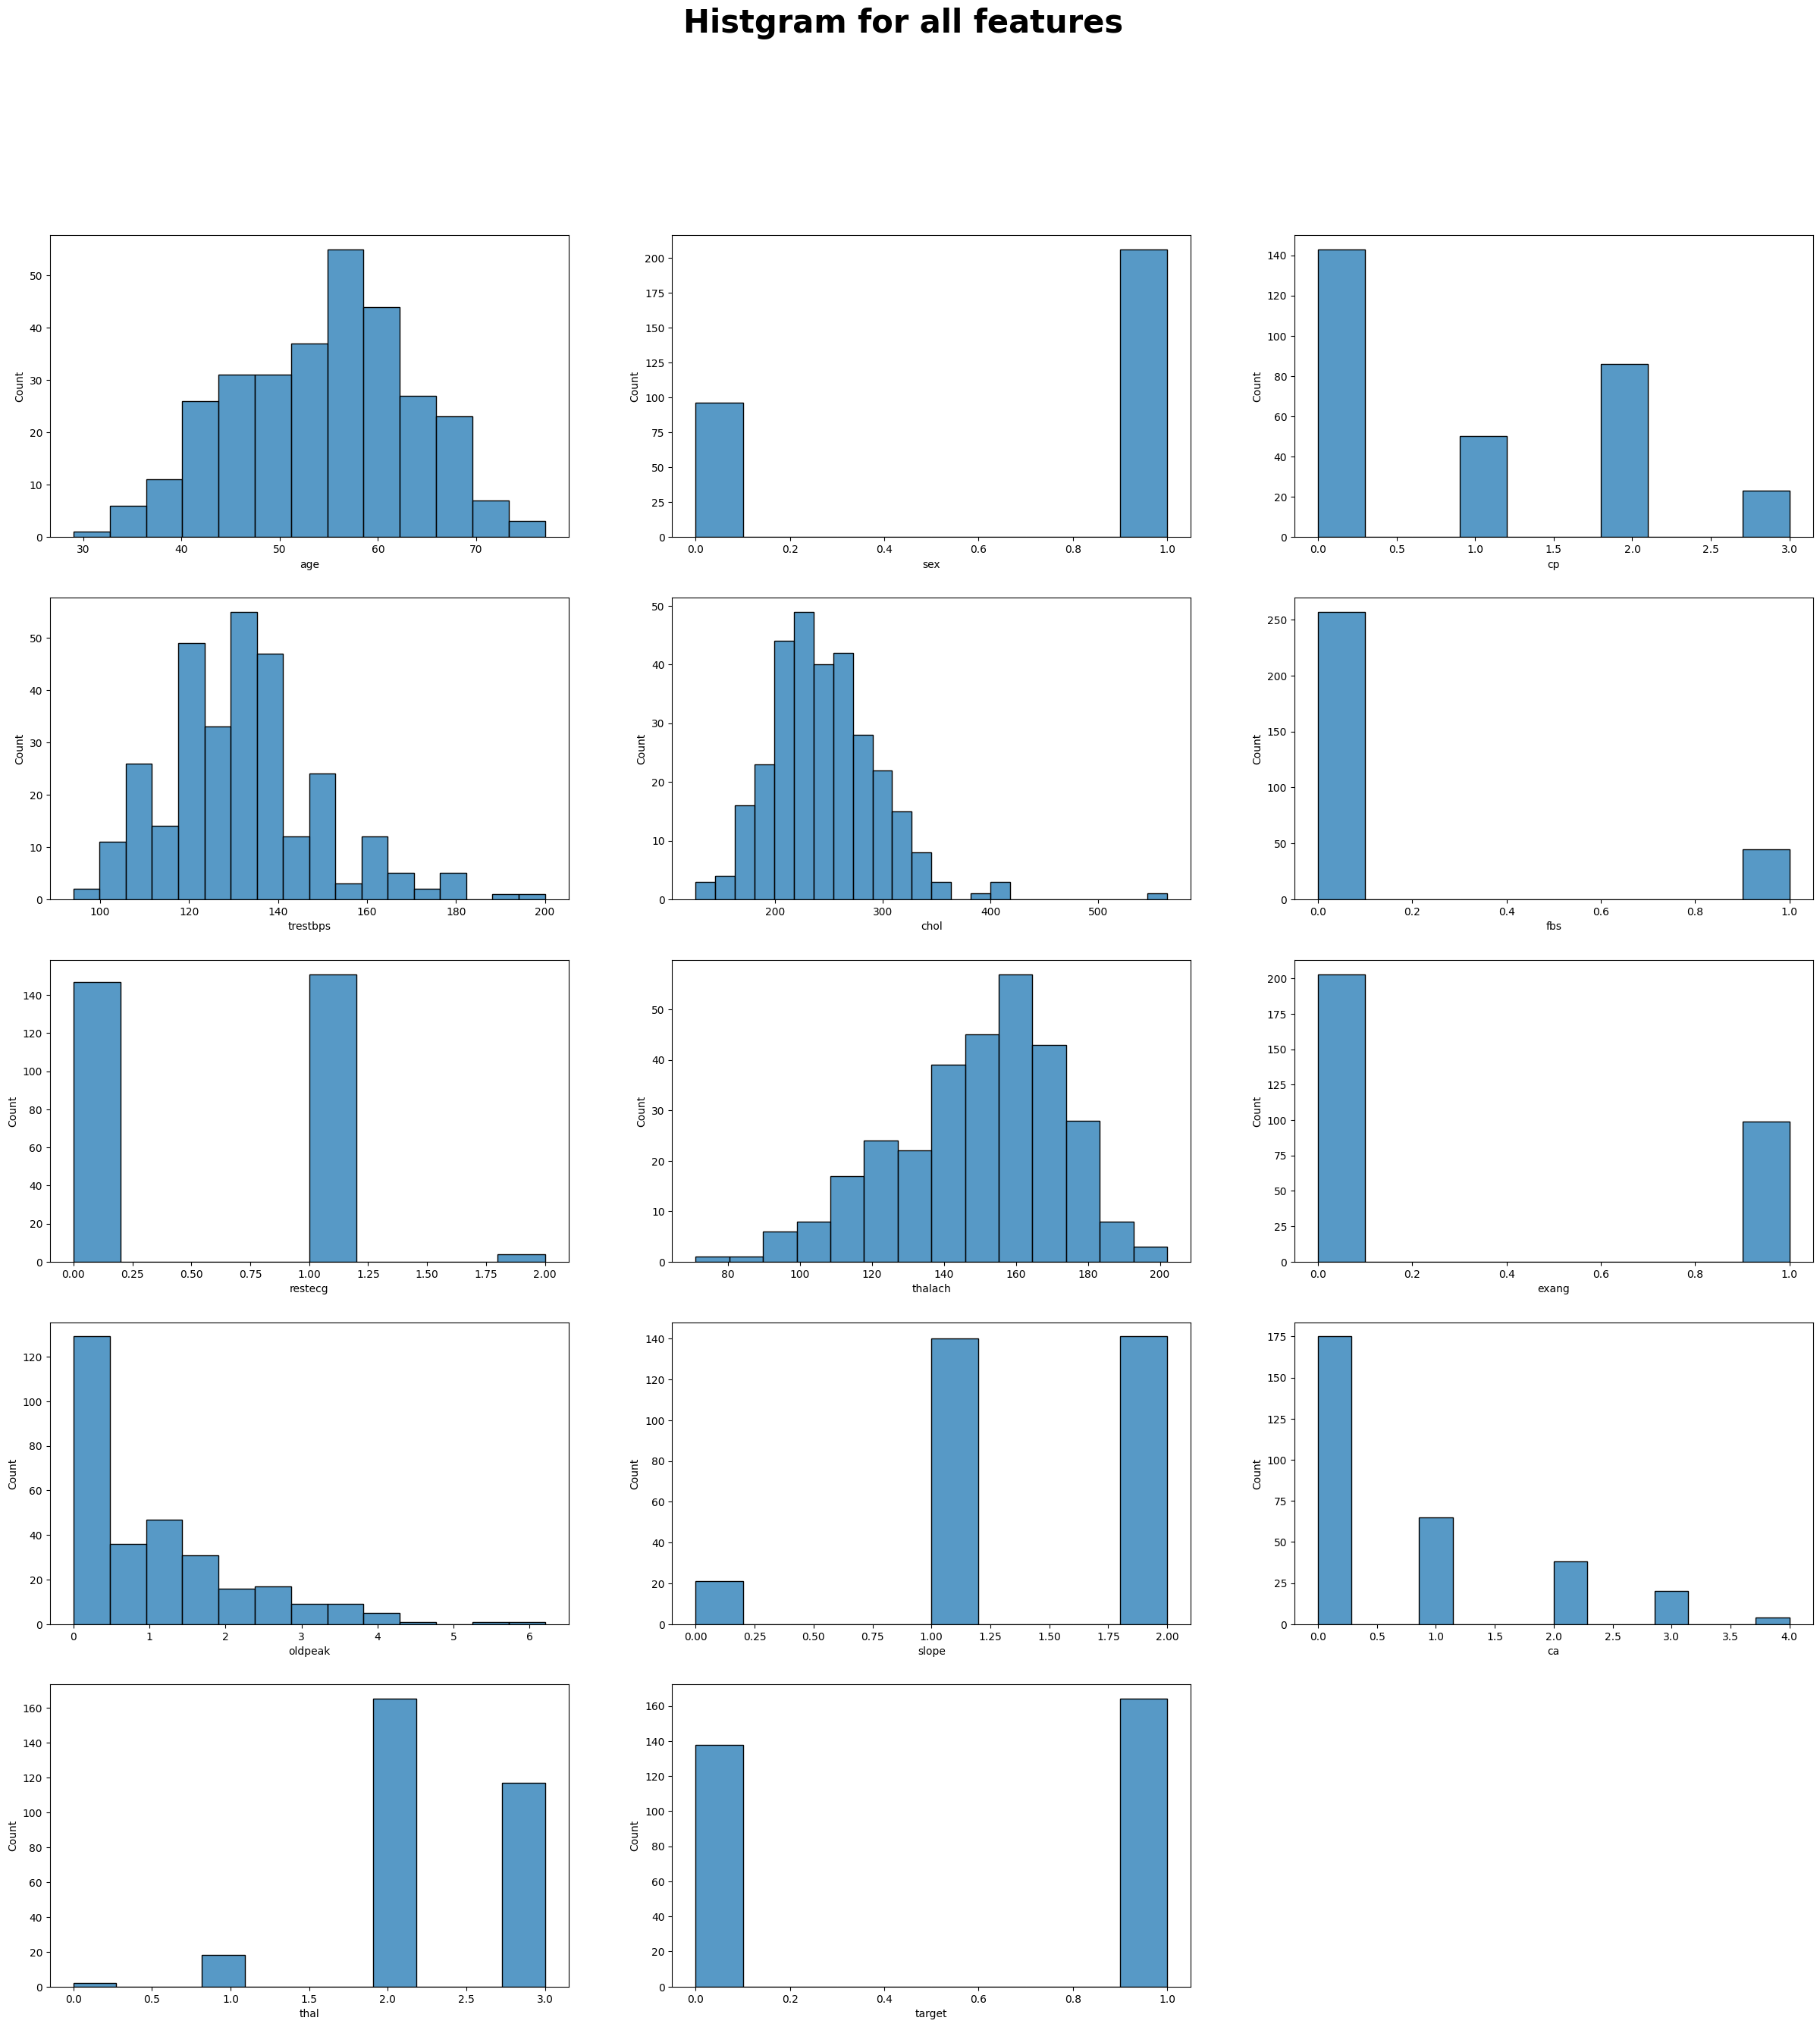

In [10]:
# Importing Matplotlib for plotting graphs
# Importing Seaborn for statistical data visualization
# Plotting histograms for all features in the diabetes dataset

import matplotlib.pyplot as plt
import seaborn as sns

counter = 0

plt.figure(figsize = (30, 30))
plt.suptitle("Histgram for all features",fontweight = "bold", fontsize = 30)
for feature in Heart_data_set.columns:
    counter = counter + 1
    plt.subplot(5,3,counter)
    sns.histplot(Heart_data_set[feature])

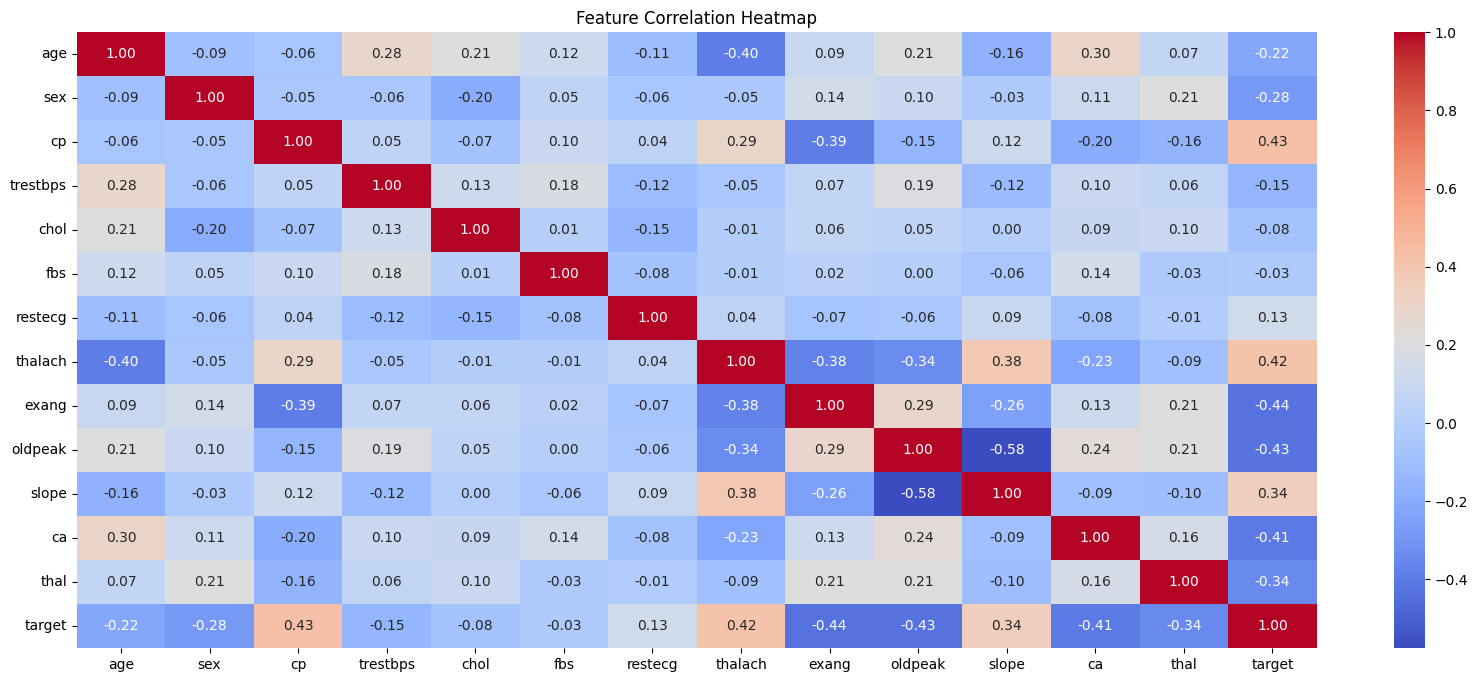

In [11]:
# Plotting the correlation heatmap

correlation_matrix = Heart_data_set.select_dtypes(include=[float, int]).corr()
plt.figure(figsize=(20, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Heatmap')
plt.show()

In [12]:
# Function to detect outliers

def detect_outliers(df, column_name):
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    # Calculate the IQR (Interquartile Range)
    IQR = Q3 - Q1
    # Define the lower and upper bounds for the data
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    no_of_outliers = sum((df[column_name] < lower_bound) | (df[column_name] > upper_bound))
    return no_of_outliers

In [13]:
# Function to remove outliers in a specified column

def remove_outliers_rows(df, column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]
    return df

In [14]:
# Function to cap outliers in a specified column

def cap_outliers(df, column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column_name] = np.where(df[column_name] < lower_bound, lower_bound,
                               np.where(df[column_name] > upper_bound, upper_bound, df[column_name]))
    return df

In [15]:
# Return the number of outliers

target_column = 'target' 
for feature in Heart_data_set.columns:
    if feature != target_column:
        print('Number of outliers in column {} is : {}'.format(feature, detect_outliers(Heart_data_set, feature)))

Number of outliers in column age is : 0
Number of outliers in column sex is : 0
Number of outliers in column cp is : 0
Number of outliers in column trestbps is : 9
Number of outliers in column chol is : 5
Number of outliers in column fbs is : 45
Number of outliers in column restecg is : 0
Number of outliers in column thalach is : 1
Number of outliers in column exang is : 0
Number of outliers in column oldpeak is : 5
Number of outliers in column slope is : 0
Number of outliers in column ca is : 24
Number of outliers in column thal is : 2


In [16]:
# Remove outliers from specified features

remove_outlier_features = ['trestbps', 'chol', 'thalach', 'oldpeak', 'thal']

for feature in remove_outlier_features:
    Heart_data_set = remove_outliers_rows(Heart_data_set, feature)

In [17]:
# Cap outliers in specified features

cap_outlier_features = ['fbs', 'ca']

for feature in cap_outlier_features:
    Heart_data_set = cap_outliers(Heart_data_set, feature)

In [18]:
# Preparing the data for modeling

X = Heart_data_set.drop(columns = ['target'], axis = 1)
Y = Heart_data_set['target']

In [19]:
# Importing train_test_split to split the data into training and testing sets
# Splitting the data into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify = Y, random_state = 42)

In [20]:
# Checking for skewness in the dataset

print(X_train.skew())

age        -0.106423
sex        -0.907007
cp          0.459195
trestbps    0.302518
chol        0.111869
fbs         0.000000
restecg     0.051979
thalach    -0.485560
exang       0.769884
oldpeak     0.924567
slope      -0.453669
ca          0.986420
thal       -0.238868
dtype: float64


In [21]:
# Importing PowerTransformer to handle skewness
# Applying Power Transformation to reduce skewness

from sklearn.preprocessing import PowerTransformer


pt = PowerTransformer(method='yeo-johnson')

X_train[['oldpeak', 'ca', 'exang']] = pt.fit_transform(X_train[['oldpeak', 'ca', 'exang']])

In [22]:
# Checking for skewness in the dataset after Power Transformation

print(X_train.skew())

age        -0.106423
sex        -0.907007
cp          0.459195
trestbps    0.302518
chol        0.111869
fbs         0.000000
restecg     0.051979
thalach    -0.485560
exang       0.769884
oldpeak     0.120443
slope      -0.453669
ca          0.461577
thal       -0.238868
dtype: float64


In [23]:
# Saving the trained PowerTransformer model to a file
import pickle

pickle.dump(pt, open('Trained_models_Heart/Power_Transformer.pkl', 'wb'))

In [24]:
# Importing StandardScaler to standardize the features
# Data Standrization

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)

In [25]:
# Saving the trained StandardScaler model to a file

pickle.dump(scaler, open('Trained_models_Heart/Scaler.pkl', 'wb'))

In [26]:
# Importing Variance Inflation Factor to check for multicollinearity
# Function to calculate Variance Inflation Factor (VIF)

from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(df):
    if isinstance(df, np.ndarray):
        df = pd.DataFrame(df)
    numeric_df = df.select_dtypes(include=[float, int])
    vif_data = pd.DataFrame()
    vif_data['feature'] = numeric_df.columns
    vif_data['VIF'] = [variance_inflation_factor(numeric_df.values, i) for i in range(numeric_df.shape[1])]
    return vif_data

In [27]:
# Calculating VIF for the training data

vif_df = calculate_vif(X_train)
print(vif_df)

    feature       VIF
0         0  1.559791
1         1  1.172148
2         2  1.230559
3         3  1.144561
4         4  1.119440
5         5       NaN
6         6  1.079196
7         7  1.691457
8         8  1.403404
9         9  1.576398
10       10  1.545281
11       11  1.369538
12       12  1.188461


/home/ali/Disease_prediction_sysetm/venv_Disease/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


In [28]:
# Check for class balance in the target variable

Y_train.value_counts(normalize = True)

target
1    0.558036
0    0.441964
Name: proportion, dtype: float64

In [29]:
# Fitting Testset with trained models 

X_test[['oldpeak', 'ca', 'exang']] = pt.transform(X_test[['oldpeak', 'ca', 'exang']])
X_test = scaler.transform(X_test)

In [30]:
# Importing cudf for GPU acceleration
# Makeing data suitable for GPU 

import cudf

X_train_gpu = cudf.DataFrame(X_train).astype('float32')
Y_train_gpu = cudf.Series(Y_train).astype('float32')
X_test_gpu = cudf.DataFrame(X_test).astype('float32')
Y_test_gpu = cudf.Series(Y_test).astype('float32')

In [31]:
# Importing F1 score for model evaluation
# Importing itertools for generating combinations
# Importing gc for garbage collection

from sklearn.metrics import f1_score
import itertools
import gc

In [32]:
# Importing KNeighborsRegressor from cuML for GPU-accelerated KNN regression
# Initializing the KNN Classifier 

from cuml.neighbors import KNeighborsClassifier

param_grid = {
    'n_neighbors': [1, 3, 5, 7, 9, 11, 13],  
    'metric': ['euclidean', 'manhattan'],     
    'weights': ['uniform'],                   
    'p': [2]  # cuML uses p=2 for Minkowski → Euclidean equivalence
}

best_score = 0
best_model = None
best_params = None

# Manual grid search
for n_neighbors, weights, metric, p in itertools.product(
        param_grid['n_neighbors'],
        param_grid['weights'],
        param_grid['metric'],
        param_grid['p']):
    
    model = KNeighborsClassifier(n_neighbors = n_neighbors, weights = weights, metric = metric, p = p, algorithm = 'brute')
    model.fit(X_train_gpu, Y_train_gpu)

    preds = model.predict(X_test_gpu).to_numpy()
    y_true = Y_test

    score = f1_score(y_true, preds, average = 'weighted')

    if score > best_score:
        best_score = score
        best_model = model
        best_params = {
            'n_neighbors': n_neighbors,
            'weights': weights,
            'metric': metric,
            'p': p
        }
    else:
        del model
        gc.collect()
Best_KNN_model = best_model

In [33]:
# Importing accuracy_score roc_auc_score, log_loss for model evaluation

from cuml.metrics import accuracy_score, roc_auc_score

In [34]:
# Making predictions and calculating metrics for the best KNN model

y_preds_KNN = Best_KNN_model.predict(X_test_gpu)
KNN_score = accuracy_score(Y_test_gpu, y_preds_KNN)
KNN_F1 = f1_score(Y_test, y_preds_KNN.to_numpy())
KNN_ROC_AUC = roc_auc_score(Y_test_gpu, y_preds_KNN)

In [35]:
# Importing classification_report and confusion_matrix for evaluation

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [36]:
# Printing the classifications report for the KNN model

CR_KNN = classification_report(Y_test, y_preds_KNN.to_numpy())
print(CR_KNN)

              precision    recall  f1-score   support

           0       0.90      0.72      0.80        25
           1       0.81      0.94      0.87        32

    accuracy                           0.84        57
   macro avg       0.86      0.83      0.83        57
weighted avg       0.85      0.84      0.84        57



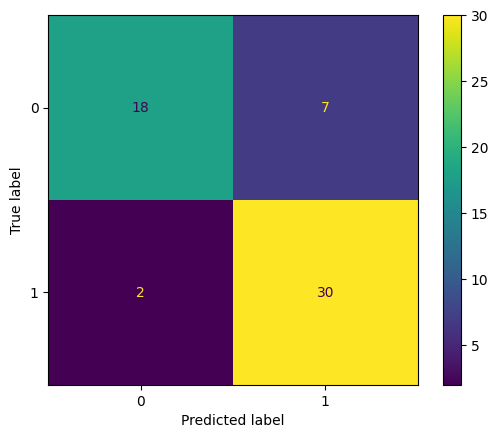

In [37]:
# Confusion matrix for KNN model

CM_KNN = confusion_matrix(Y_test, y_preds_KNN.to_numpy())
CM_KNN = ConfusionMatrixDisplay(CM_KNN)
CM_KNN.plot()
plt.show()

In [38]:
# Importing LogisticRegression from cuML for GPU-accelerated logistic regression
# Initializing the Logistic Regression model with hyperparameters

from cuml.linear_model import LogisticRegression

param_grid = {
    'penalty': ['l2'],                      # Only 'l2' is supported
    'C': [0.01, 0.1, 0.5, 1.0, 2.0, 5.0],  # Wider, GPU-safe range
    'max_iter': [1000, 2000, 3000, 4000],   # Extended, within reason
    'tol': [1e-5, 1e-4, 1e-3],              # cuML-compatible tolerance
    'fit_intercept': [True, False],         
    'solver': ['qn']                         # Only solver cuML supports
}

best_score = 0
best_model = None
best_params = None

# Manual grid search
for penalty, C, fit_intercept, max_iter, tol, solver in itertools.product(
        param_grid['penalty'],
        param_grid['C'],
        param_grid['fit_intercept'],
        param_grid['max_iter'],
        param_grid['tol'],
        param_grid['solver']):
    # Handle l1_ratio only when penalty == 'elasticnet'
    if penalty == 'elasticnet':
        for l1_ratio in param_grid['l1_ratio']:
            model = LogisticRegression(
                penalty=penalty,
                C=C,
                fit_intercept=fit_intercept,
                max_iter=max_iter,
                tol=tol,
                solver=solver,
                l1_ratio=l1_ratio
            )
            model.fit(X_train_gpu, Y_train_gpu)

            preds = model.predict(X_test_gpu).to_numpy()
            score = f1_score(Y_test, preds, average='weighted')

            if score > best_score:
                best_score = score
                best_model = model
                best_params = {
                    'penalty': penalty,
                    'C': C,
                    'fit_intercept': fit_intercept,
                    'max_iter': max_iter,
                    'tol': tol,
                    'solver': solver,
                    'l1_ratio': l1_ratio
                }
            else:
                del model
                gc.collect()
    else:
        model = LogisticRegression(
            penalty=penalty,
            C=C,
            fit_intercept=fit_intercept,
            max_iter=max_iter,
            tol=tol,
            solver=solver
            # No l1_ratio here
        )
        model.fit(X_train_gpu, Y_train_gpu)

        preds = model.predict(X_test_gpu).to_numpy()
        score = f1_score(Y_test, preds, average='weighted')

        if score > best_score:
            best_score = score
            best_model = model
            best_params = {
                'penalty': penalty,
                'C': C,
                'fit_intercept': fit_intercept,
                'max_iter': max_iter,
                'tol': tol,
                'solver': solver
            }
        else:
           del model
           gc.collect()
Best_Logistic_model = best_model

In [39]:
# Print Feature Importances for the Logistic Regreesion model

importances = pd.Series(Best_Logistic_model.coef_.to_pandas().values.ravel(), index = X_train_gpu.columns).sort_values(ascending = False)
print("Top 5 Important Features:")
print(importances.head(5))

Top 5 Important Features:
2     0.707015
7     0.456042
10    0.370602
6     0.352214
0     0.050025
dtype: float32


In [40]:
# Making predictions and calculating metrics for the best Logistic Regression model

y_preds_Logistic = Best_Logistic_model.predict(X_test_gpu)
Logistic_score = accuracy_score(Y_test_gpu, y_preds_Logistic)
Logistic_F1 = f1_score(Y_test, y_preds_Logistic.to_numpy())
Logistic_ROC_AUC = roc_auc_score(Y_test_gpu, y_preds_Logistic)

In [41]:
# Printing the classifications report for the Logistic Regression model

CR_logistic = classification_report(Y_test, y_preds_Logistic.to_numpy())
print(CR_logistic)

              precision    recall  f1-score   support

           0       1.00      0.80      0.89        25
           1       0.86      1.00      0.93        32

    accuracy                           0.91        57
   macro avg       0.93      0.90      0.91        57
weighted avg       0.92      0.91      0.91        57



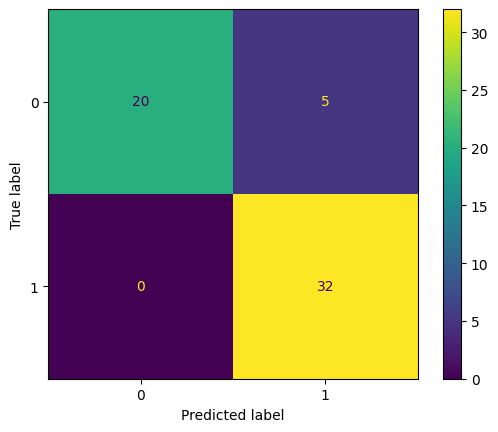

In [42]:
# Confusion matrix for Logistic model

CM_logistic = confusion_matrix(Y_test, y_preds_Logistic.to_numpy())
CM_logistic = ConfusionMatrixDisplay(CM_logistic)
CM_logistic.plot()
plt.show()

In [43]:
# Importing RandomForestClassifier from cuML for GPU-accelerated random forest classification
# Initializing the Random Forest Classifier with hyperparameters

from cuml.ensemble import RandomForestClassifier

param_grid = {
    'n_estimators': [100, 150, 200, 250],   # 4 options
    'max_depth': [6, 8, 10, 12],            # 4 options
    'max_features': [0.6, 0.8, 1.0],        # 3 options
    'bootstrap': [True],                    # Fixed to 1 value
    'split_criterion': ['gini'],            # Fixed
    'max_leaves': [64, 128, 256],           # 3 options
    'max_samples': [0.7, 0.8, 0.9, 1.0]     # 4 options
}

best_score = 0
best_model = None
best_params = None

# Manual grid searchS
for n_estimators, max_depth, max_features, bootstrap, split_criterion, max_leaves, max_samples in itertools.product(
        param_grid['n_estimators'],
        param_grid['max_depth'],
        param_grid['max_features'],
        param_grid['bootstrap'],
        param_grid['split_criterion'],
        param_grid['max_leaves'],
        param_grid['max_samples']):
    
    model = RandomForestClassifier(n_estimators = n_estimators, max_depth = max_depth, max_features = max_features, bootstrap = bootstrap, 
                                   split_criterion = split_criterion, max_leaves = max_leaves, max_samples = max_samples, random_state = 42)
    
    model.fit(X_train_gpu, Y_train_gpu)
    preds = model.predict(X_test_gpu).to_numpy()
    y_true = Y_test

    score = f1_score(y_true, preds, average = 'weighted')

    if score > best_score:
        if best_model is not None:
            del best_model
            gc.collect()
        best_score = score
        best_model = model
        best_params = {
            'n_estimators': n_estimators,
            'max_depth': max_depth,
            'max_features': max_features,
            'bootstrap': bootstrap,
            'split_criterion': split_criterion,
            'max_leaves': max_leaves,
            'max_samples': max_samples
        }
    else:
        del model
        gc.collect()
        
Best_RandomForest_model = best_model

In [44]:
# Saving the best models to files

pickle.dump(Best_RandomForest_model, open('Trained_models_Heart/RandomForest_model.pkl', 'wb'))

In [45]:
# Loading the best Random Forest model from file

Best_RandomForest_model = pickle.load(open('Trained_models_Heart/RandomForest_model.pkl', 'rb'))

In [46]:
# Making predictions and calculating metrics for the best RandomForest model

y_preds_RandomForest = Best_RandomForest_model.predict(X_test_gpu)
RandomForest_score = accuracy_score(Y_test_gpu, y_preds_RandomForest)
RandomForest_F1 = f1_score(Y_test, y_preds_RandomForest.to_numpy())
RandomForest_ROC_AUC = roc_auc_score(Y_test_gpu, y_preds_RandomForest)

In [47]:
# Printing the classifications report for the Random Forest model

CR_RandomForest = classification_report(Y_test, y_preds_RandomForest.to_numpy())
print(CR_RandomForest)

              precision    recall  f1-score   support

           0       0.90      0.76      0.83        25
           1       0.83      0.94      0.88        32

    accuracy                           0.86        57
   macro avg       0.87      0.85      0.85        57
weighted avg       0.86      0.86      0.86        57



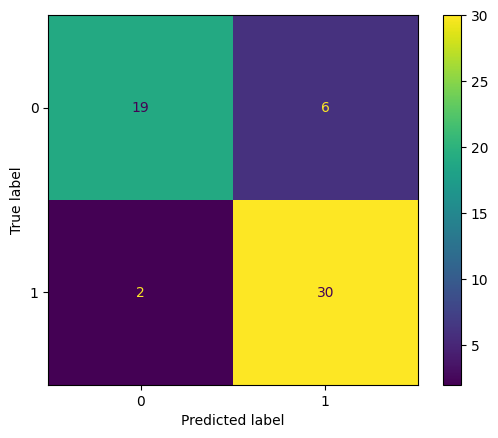

In [48]:
# Confusion matrix for RandomForest model

CM_RandomForest = confusion_matrix(Y_test, y_preds_RandomForest.to_numpy())
CM_RandomForest = ConfusionMatrixDisplay(CM_RandomForest)
CM_RandomForest.plot()
plt.show()

In [49]:
# Importing SVC from cuML for GPU-accelerated support vector classification
# Initializing the SVC model with hyperparameters

from cuml.svm import SVC

param_grid = {
    'C': [0.5, 1.0, 5.0, 10.0],              # Reduced to 4 values
    'kernel': ['rbf', 'linear', 'poly'],      
    'gamma': [0.01, 0.1, 1.0],                # Removed 0.001 for simplicity
    'degree': [2, 3],                          # Removed 4
    'tol': [1e-4, 1e-3],                      
    'max_iter': [1000, 1500]                  
}

best_score = 0
best_model = None
best_params = None

for C, kernel, gamma, degree, tol, max_iter, in itertools.product(
        param_grid['C'],
        param_grid['kernel'],
        param_grid['gamma'],
        param_grid['degree'],
        param_grid['tol'],
        param_grid['max_iter']):

    svc_params = {
        'C': C,
        'kernel': kernel,
        'gamma': gamma,
        'degree': degree if kernel == 'poly' else 3,  # Only use degree for polynomial kernel
        'tol': tol,
        'max_iter': max_iter
    }

    model = SVC(**svc_params)
    model.fit(X_train_gpu, Y_train_gpu)

    preds = model.predict(X_test_gpu).to_numpy()
    y_true = Y_test

    score = f1_score(y_true, preds, average='weighted')

    if score > best_score:
        best_score = score
        best_model = model
        best_params = svc_params
    else:
        del model
        gc.collect()
Best_SVM_model = best_model

[2025-07-16 22:32:55.521] [CUML] [warning] SVC with the linear kernel can be much faster using the specialized solver provided by LinearSVC. Consider switching to LinearSVC if tranining takes too long.


In [50]:
# Making predictions and calculating metrics for the best SVM model

y_preds_SVM = Best_SVM_model.predict(X_test_gpu)
SVM_score = accuracy_score(Y_test_gpu, y_preds_SVM)
SVM_F1 = f1_score(Y_test, y_preds_SVM.to_numpy())
SVM_ROC_AUC = roc_auc_score(Y_test_gpu, y_preds_SVM)

In [51]:
# Printing the classifications report for the SVM model

CR_SVM = classification_report(Y_test, y_preds_SVM.to_numpy())
print(CR_SVM)

              precision    recall  f1-score   support

           0       1.00      0.80      0.89        25
           1       0.86      1.00      0.93        32

    accuracy                           0.91        57
   macro avg       0.93      0.90      0.91        57
weighted avg       0.92      0.91      0.91        57



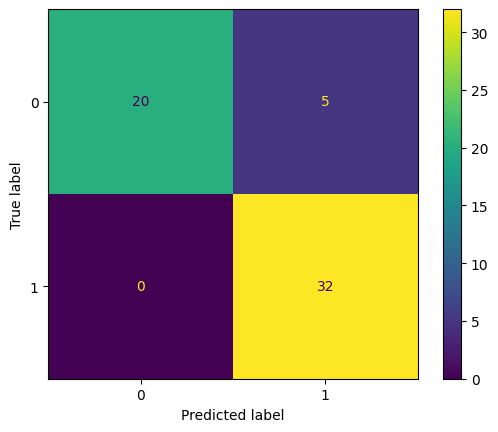

In [52]:
# Confusion matrix for SVM model

CM_SVM = confusion_matrix(Y_test, y_preds_SVM.to_numpy())
CM_SVM = ConfusionMatrixDisplay(CM_SVM)
CM_SVM.plot()
plt.show()

In [53]:
# Importing XGBClassifier from XGBoost for GPU-accelerated gradient boosting classification
# Initializing the XGBClassifier with GPU support and hyperparameters

from xgboost import XGBClassifier

param_grid = {
    'n_estimators': [100, 150, 200],       # Added 200
    'max_depth': [4, 6, 8],                # Added 8
    'learning_rate': [0.05, 0.1],          # Removed 0.2 for balance
    'subsample': [0.7, 0.8, 1.0],          # Added 0.7
    'colsample_bytree': [0.6, 0.8],        # Added 0.6, removed 0.9
    'gamma': [0, 0.1],                     
    'reg_alpha': [0, 0.1],                 
    'reg_lambda': [1.0],                   
    'min_child_weight': [1, 3]             
}

best_score = 0
best_model = None
best_params = None

for n_estimators, max_depth, learning_rate, subsample, colsample_bytree, gamma, reg_alpha, reg_lambda, min_child_weight in itertools.product(
        param_grid['n_estimators'],
        param_grid['max_depth'],
        param_grid['learning_rate'],
        param_grid['subsample'],
        param_grid['colsample_bytree'],
        param_grid['gamma'],
        param_grid['reg_alpha'],
        param_grid['reg_lambda'],
        param_grid['min_child_weight']):
    
    model = XGBClassifier(n_estimators = n_estimators, max_depth = max_depth, learning_rate = learning_rate, subsample = subsample, colsample_bytree = colsample_bytree,
        gamma = gamma, reg_alpha = reg_alpha, reg_lambda = reg_lambda, min_child_weight = min_child_weight,tree_method = 'hist', device = 'cuda', eval_metric = 'logloss', 
        random_state = 42)
    
    model.fit(X_train_gpu, Y_train_gpu)
    preds = model.predict(X_test_gpu)
    y_true = Y_test

    score = f1_score(y_true, preds, average = 'weighted')

    if score > best_score:
        if best_model is not None:
            del best_model
            gc.collect()
        best_score = score
        best_model = model
        best_params = {
            'n_estimators': n_estimators,
            'max_depth': max_depth,
            'learning_rate': learning_rate,
            'subsample': subsample,
            'colsample_bytree': colsample_bytree,
            'gamma': gamma,
            'reg_alpha': reg_alpha,
            'reg_lambda': reg_lambda,
            'min_child_weight': min_child_weight
        }
    else:
        del model
        gc.collect()

Best_XGB_model = best_model

In [54]:
# Print Feature Importances for the XGB model

importances = pd.Series(Best_XGB_model.feature_importances_, index = X_train_gpu.columns).sort_values(ascending = False)
print("Top 5 Important Features:")
print(importances.head(5))

Top 5 Important Features:
12    0.195395
2     0.124473
11    0.122433
8     0.102868
7     0.075574
dtype: float32


In [55]:
# Saving the best models to files

pickle.dump(Best_XGB_model, open('Trained_models_Heart/XGB_model.pkl', 'wb'))

In [56]:
# Loading the best XGB model from file

Best_XGB_model = pickle.load(open('Trained_models_Heart/XGB_model.pkl', 'rb'))

In [57]:
# Making predictions and calculating metrics for the best XGB model

y_preds_XGB = Best_XGB_model.predict(X_test_gpu)
XGB_score = accuracy_score(Y_test_gpu, y_preds_XGB)
XGB_F1 = f1_score(Y_test, y_preds_XGB)
XGB_ROC_AUC = roc_auc_score(Y_test_gpu, y_preds_XGB)

In [58]:
# Printing the classifications report for the XGB model

CR_XGB = classification_report(Y_test, y_preds_XGB)
print(CR_XGB)

              precision    recall  f1-score   support

           0       0.91      0.80      0.85        25
           1       0.86      0.94      0.90        32

    accuracy                           0.88        57
   macro avg       0.88      0.87      0.87        57
weighted avg       0.88      0.88      0.88        57



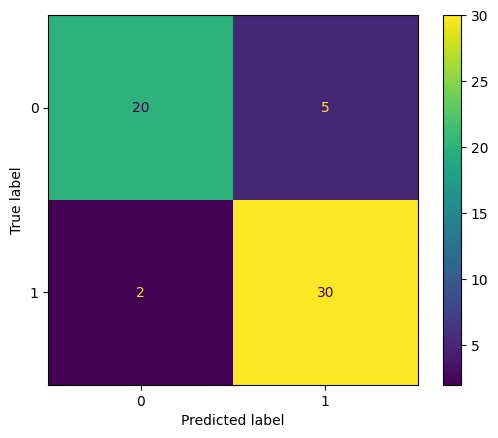

In [59]:
# Confusion matrix for XGB model

CM_XGB = confusion_matrix(Y_test, y_preds_XGB)
CM_XGB = ConfusionMatrixDisplay(CM_XGB)
CM_XGB.plot()
plt.show()

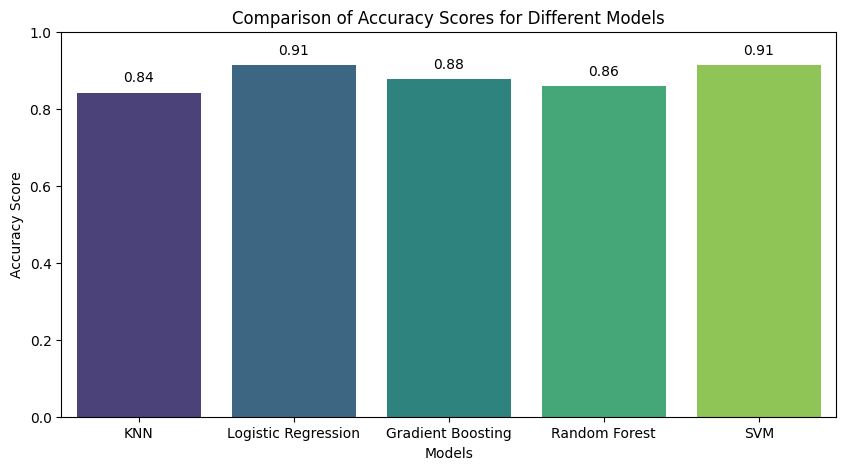

In [60]:
# Comparison of Accuracy Scores for Different Models

models = ['KNN','Logistic Regression', 'Gradient Boosting', 'Random Forest', 'SVM']
scores = [KNN_score, Logistic_score, XGB_score, RandomForest_score, SVM_score]  

plt.figure(figsize=(10, 5))
sns.barplot(x = models, y = scores, hue = models, legend = False, palette = 'viridis')

plt.xlabel('Models')
plt.ylabel('Accuracy Score')
plt.title('Comparison of Accuracy Scores for Different Models')
plt.ylim(0, 1) 

for i, score in enumerate(scores):
    plt.text(i, score + 0.02, f'{score:.2f}', ha = 'center', va = 'bottom')

plt.show()

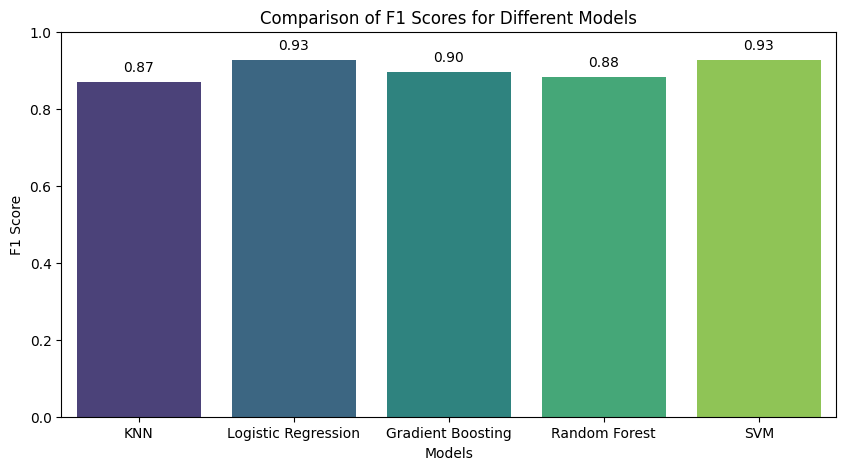

In [61]:
# Comparison of F1 Scores for Different Models

models = ['KNN','Logistic Regression', 'Gradient Boosting', 'Random Forest', 'SVM']
F1_scores = [KNN_F1, Logistic_F1, XGB_F1, RandomForest_F1, SVM_F1]  

plt.figure(figsize=(10, 5))
sns.barplot(x = models, y = F1_scores, hue = models, legend = False, palette = 'viridis')

plt.xlabel('Models')
plt.ylabel('F1 Score')
plt.title('Comparison of F1 Scores for Different Models')
plt.ylim(0, 1) 

for i, score in enumerate(F1_scores):
    plt.text(i, score + 0.02, f'{score:.2f}', ha = 'center', va = 'bottom')

plt.show()

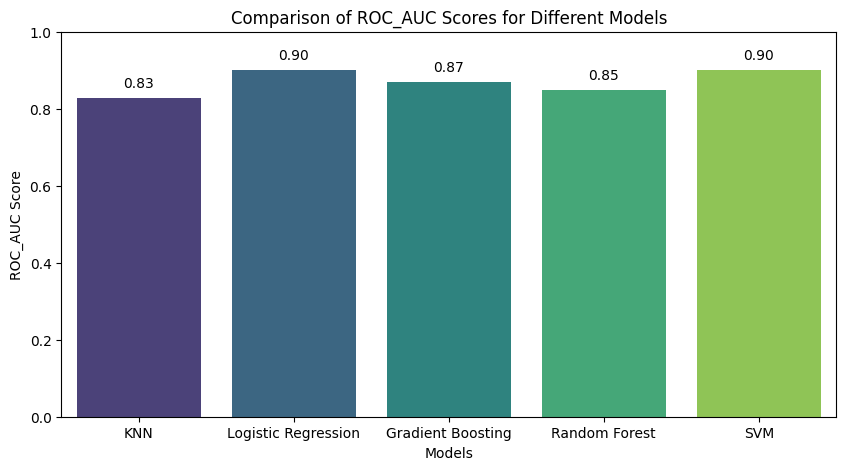

In [62]:
# Comparison of ROC_AUC Scores for Different Models

models = ['KNN','Logistic Regression', 'Gradient Boosting', 'Random Forest', 'SVM']
ROUC_AUC_scores = [KNN_ROC_AUC, Logistic_ROC_AUC, XGB_ROC_AUC, RandomForest_ROC_AUC, SVM_ROC_AUC]  

plt.figure(figsize=(10, 5))
sns.barplot(x = models, y = ROUC_AUC_scores, hue = models, legend = False, palette = 'viridis')

plt.xlabel('Models')
plt.ylabel('ROC_AUC Score')
plt.title('Comparison of ROC_AUC Scores for Different Models')
plt.ylim(0, 1) 

for i, score in enumerate(ROUC_AUC_scores):
    plt.text(i, score + 0.02, f'{score:.2f}', ha = 'center', va = 'bottom')

plt.show()

In [63]:
# Saving the best models to files based on results

pickle.dump(Best_SVM_model, open('Trained_models_Heart/Heart.pkl', 'wb'))